# Data Exploration for Threat Zone Prediction

This notebook explores the sensor data used for predicting threat zones in oil and gas industries. The data includes readings from MQ2, MQ4, MQ6, and MQ8 gas sensors, along with temperature and humidity measurements from DHT11 sensors.

In [9]:
import sys
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Add parent directory to path for importing modules
sys.path.insert(0, os.path.abspath(os.path.join(os.getcwd(), '..')))

from utils.data_processing import generate_synthetic_arduino_data
from models.preprocessing import generate_synthetic_data

%matplotlib inline
plt.style.use('ggplot')
sns.set_theme(style="whitegrid")

In [10]:
pip install folium

Note: you may need to restart the kernel to use updated packages.


## Generate Sample Data

Since we don't have real data yet, let's generate some synthetic data to explore.

In [11]:
# Generate synthetic Arduino data
arduino_data = generate_synthetic_arduino_data(n_samples=1000, include_anomalies=True)

# Convert to DataFrame
df = pd.DataFrame(arduino_data)

# Display the first few rows
df.head()

,mq2,mq4,mq6,mq8,temperature,humidity,latitude,longitude,timestamp
0,434.072624,292.264148,242.451318,162.842652,24.132711,64.779384,28.602596,77.201310,2025-05-31 11:31:16.238701
1,434.159881,239.503944,305.794691,244.615283,24.552762,68.081559,28.601252,77.217648,2025-05-31 11:31:21.238701
2,579.325037,208.987775,411.819933,228.898607,15.148939,61.069845,28.625284,77.195055,2025-05-31 11:31:26.238701
3,379.833252,310.478262,412.155864,159.115123,24.790408,57.279605,28.610416,77.208338,2025-05-31 11:31:31.238701
4,576.268833,466.408866,407.911893,241.177228,24.277408,72.332030,28.593759,77.209463,2025-05-31 11:31:36.238701


In [12]:
# Basic statistics
df.describe()

,mq2,mq4,mq6,mq8,temperature,humidity,latitude,longitude,timestamp
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000
mean,643.302294,380.614440,505.411378,257.265935,27.900415,60.238024,28.613481,77.209208,2025-05-31 12:12:53.755094784
min,205.975519,57.395189,128.800319,57.620668,6.772755,31.705200,28.581140,77.172623,2025-05-31 11:31:16.238701
25%,434.129971,250.700414,343.320930,167.754976,22.108413,52.956561,28.606311,77.202220,2025-05-31 11:52:04.995350016
50%,516.358910,310.562778,408.956562,207.920420,25.913163,59.946098,28.613495,77.209040,2025-05-31 12:12:53.755749120
75%,606.436014,386.944592,490.659485,250.471696,30.328007,66.532053,28.620604,77.216262,2025-05-31 12:33:42.516753920
max,2641.556949,1872.778841,2043.895625,1143.848117,61.907017,95.538529,28.644435,77.241138,2025-05-31 12:54:31.279286
std,438.749959,259.104648,332.591544,183.304798,9.526987,10.364014,0.010047,0.010196,NaN


## Exploring Gas Sensor Readings

Let's explore the distributions of the gas sensor readings.

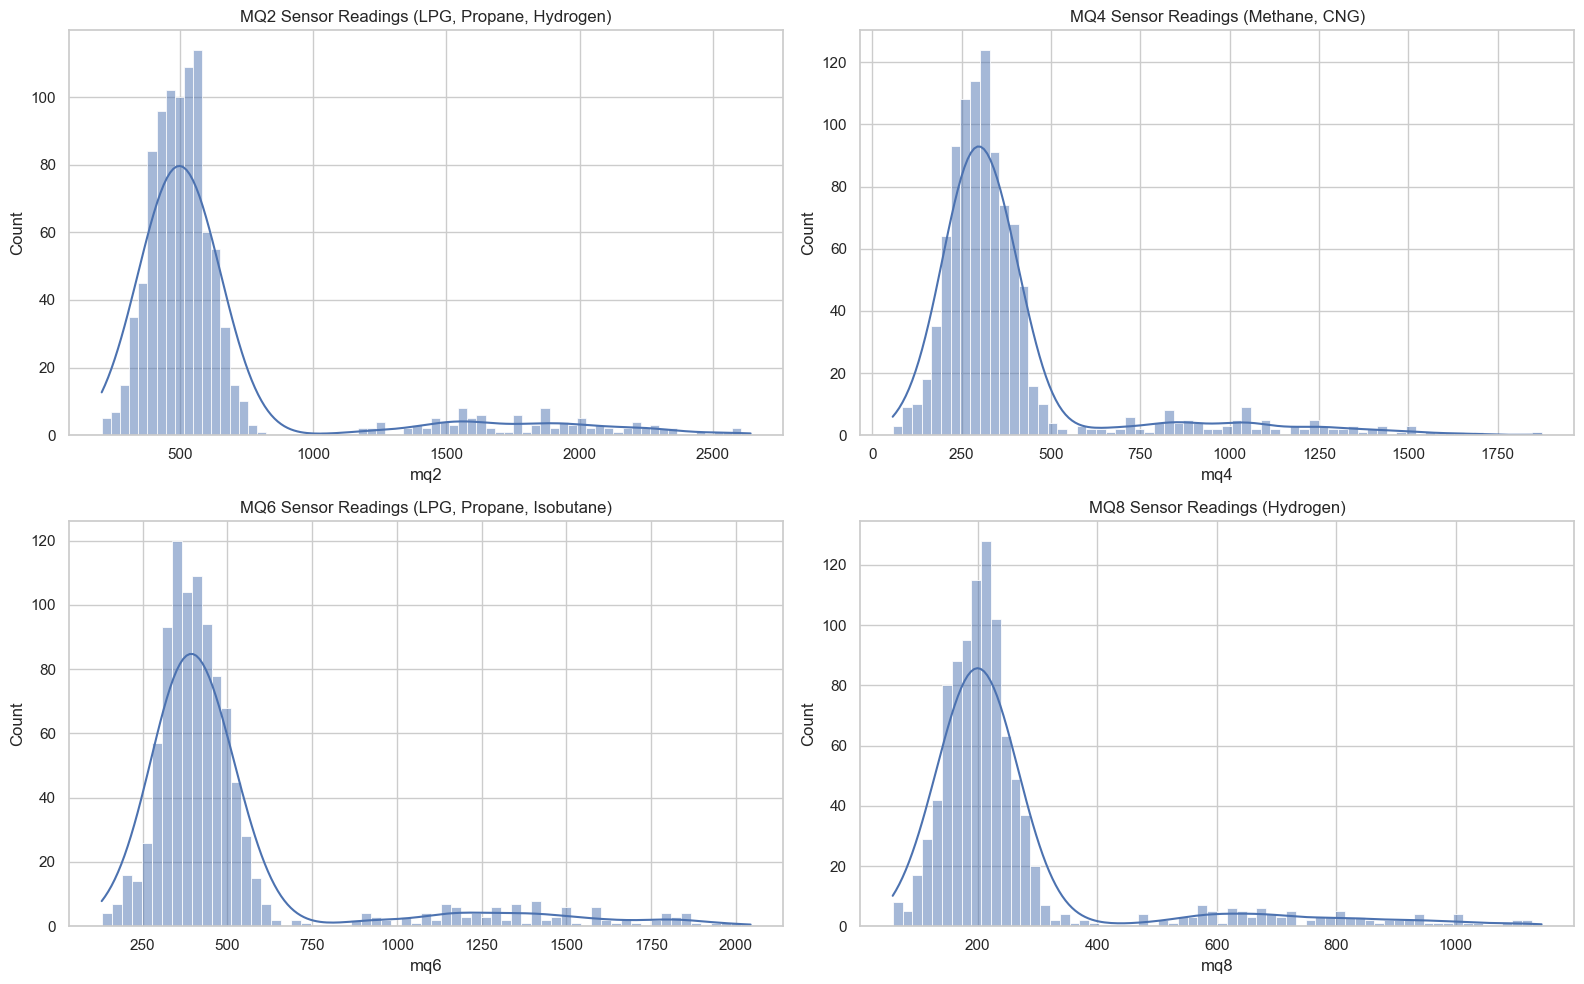

In [13]:
# Set up a figure with subplots
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# Plot histograms for each gas sensor
sns.histplot(df['mq2'], kde=True, ax=axes[0, 0])
axes[0, 0].set_title('MQ2 Sensor Readings (LPG, Propane, Hydrogen)')

sns.histplot(df['mq4'], kde=True, ax=axes[0, 1])
axes[0, 1].set_title('MQ4 Sensor Readings (Methane, CNG)')

sns.histplot(df['mq6'], kde=True, ax=axes[1, 0])
axes[1, 0].set_title('MQ6 Sensor Readings (LPG, Propane, Isobutane)')

sns.histplot(df['mq8'], kde=True, ax=axes[1, 1])
axes[1, 1].set_title('MQ8 Sensor Readings (Hydrogen)')

plt.tight_layout()
plt.show()

## Temperature and Humidity Distribution

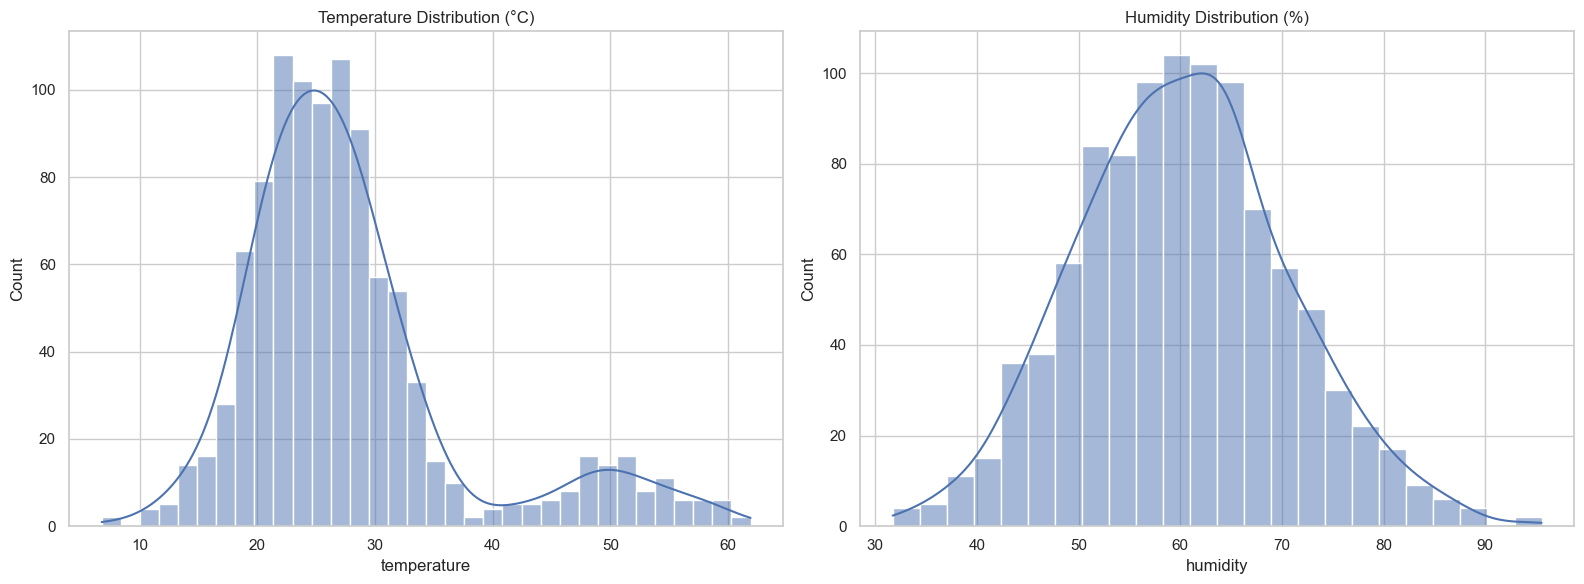

In [14]:
# Plot temperature and humidity
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

sns.histplot(df['temperature'], kde=True, ax=ax[0])
ax[0].set_title('Temperature Distribution (°C)')

sns.histplot(df['humidity'], kde=True, ax=ax[1])
ax[1].set_title('Humidity Distribution (%)')

plt.tight_layout()
plt.show()

## Correlation Analysis

Let's examine the correlations between different sensors to identify relationships.

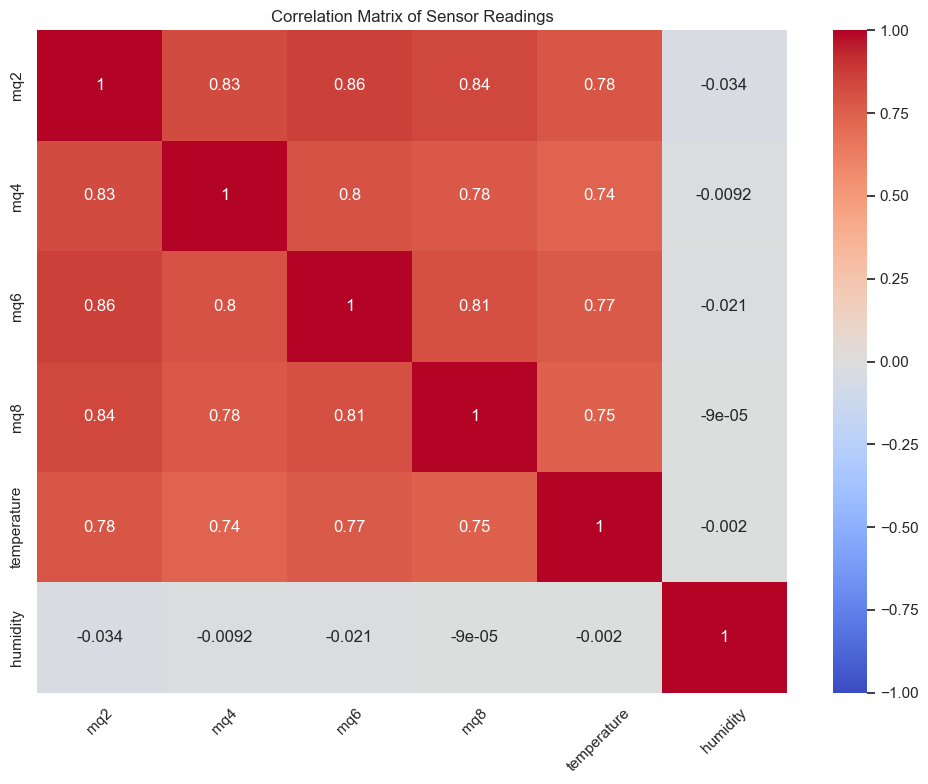

In [15]:
# Select only numeric columns for correlation analysis
numeric_columns = ['mq2', 'mq4', 'mq6', 'mq8', 'temperature', 'humidity']
correlation_df = df[numeric_columns]

# Calculate correlation matrix
corr_matrix = correlation_df.corr()

# Plot correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Sensor Readings')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Time Series Visualization

Let's visualize the sensor readings over time to look for patterns.

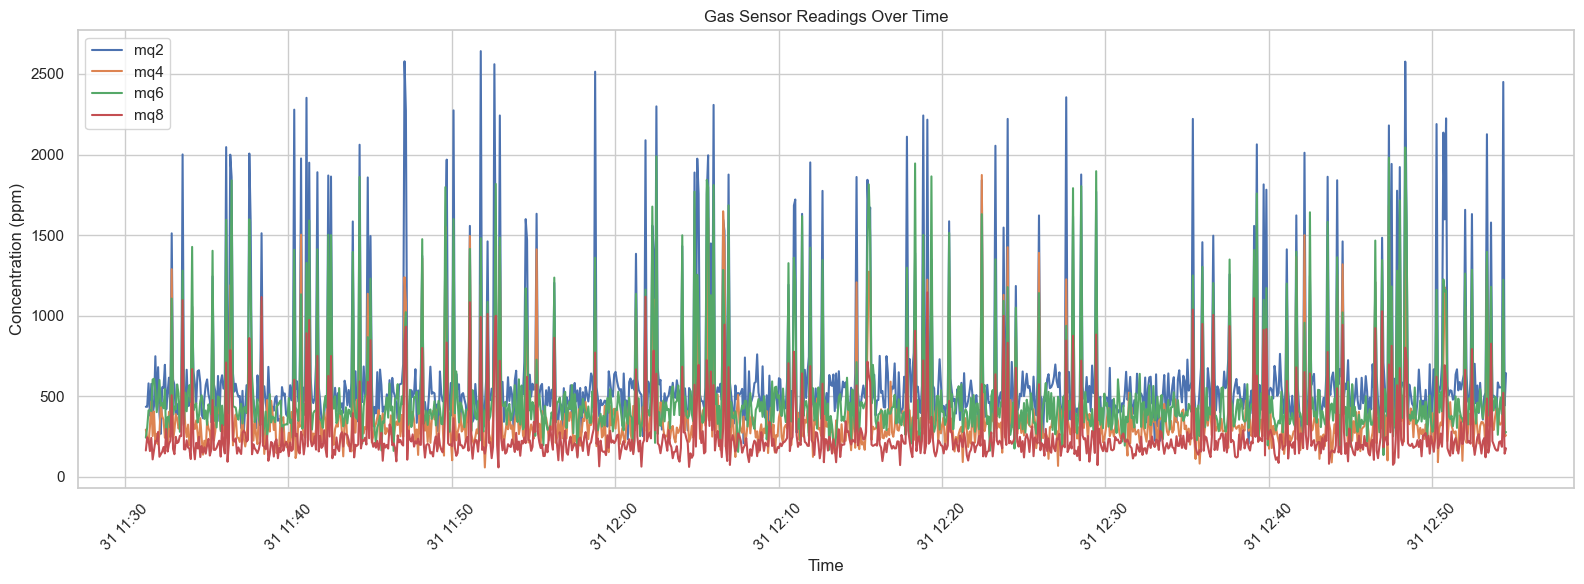

In [16]:
# Set timestamp as index
df_time = df.sort_values('timestamp').set_index('timestamp')

# Plot gas sensors over time
plt.figure(figsize=(16, 6))
for sensor in ['mq2', 'mq4', 'mq6', 'mq8']:
    plt.plot(df_time.index, df_time[sensor], label=sensor)

plt.title('Gas Sensor Readings Over Time')
plt.xlabel('Time')
plt.ylabel('Concentration (ppm)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

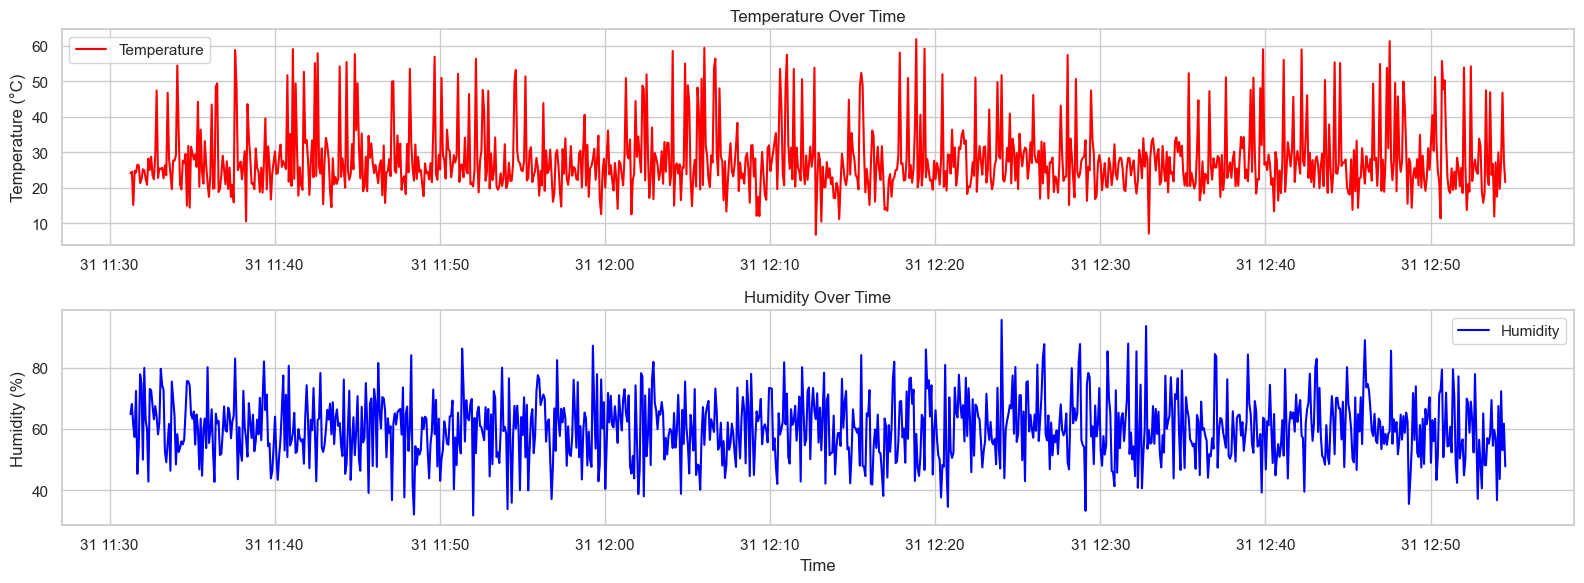

In [17]:
# Plot temperature and humidity over time
plt.figure(figsize=(16, 6))

# Temperature plot
plt.subplot(2, 1, 1)
plt.plot(df_time.index, df_time['temperature'], color='red', label='Temperature')
plt.title('Temperature Over Time')
plt.ylabel('Temperature (°C)')
plt.grid(True)
plt.legend()

# Humidity plot
plt.subplot(2, 1, 2)
plt.plot(df_time.index, df_time['humidity'], color='blue', label='Humidity')
plt.title('Humidity Over Time')
plt.xlabel('Time')
plt.ylabel('Humidity (%)')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

## Anomaly Detection

Let's identify potential anomalies in the data using a simple threshold approach.

In [18]:
# Define thresholds (these should be determined based on domain knowledge)
thresholds = {
    'mq2': 1000,  # ppm
    'mq4': 900,   # ppm
    'mq6': 1000,  # ppm
    'mq8': 600,   # ppm
    'temperature': 40  # Celsius
}

# Flag anomalies based on thresholds
for sensor, threshold in thresholds.items():
    df[f'{sensor}_anomaly'] = df[sensor] > threshold

# Create an overall anomaly flag
df['is_anomaly'] = df[[f'{sensor}_anomaly' for sensor in thresholds.keys()]].any(axis=1)

# Display samples of normal vs anomalous readings
print("Normal samples:")
print(df[~df['is_anomaly']].head())
print("\nAnomalous samples:")
print(df[df['is_anomaly']].head())

Normal samples:
          mq2         mq4         mq6         mq8  temperature   humidity  \
0  434.072624  292.264148  242.451318  162.842652    24.132711  64.779384   
1  434.159881  239.503944  305.794691  244.615283    24.552762  68.081559   
2  579.325037  208.987775  411.819933  228.898607    15.148939  61.069845   
3  379.833252  310.478262  412.155864  159.115123    24.790408  57.279605   
4  576.268833  466.408866  407.911893  241.177228    24.277408  72.332030   

    latitude  longitude                  timestamp  mq2_anomaly  mq4_anomaly  \
0  28.602596  77.201310 2025-05-31 11:31:16.238701        False        False   
1  28.601252  77.217648 2025-05-31 11:31:21.238701        False        False   
2  28.625284  77.195055 2025-05-31 11:31:26.238701        False        False   
3  28.610416  77.208338 2025-05-31 11:31:31.238701        False        False   
4  28.593759  77.209463 2025-05-31 11:31:36.238701        False        False   

   mq6_anomaly  mq8_anomaly  temperature

## Visualize Anomalies

Let's visualize some of the detected anomalies.

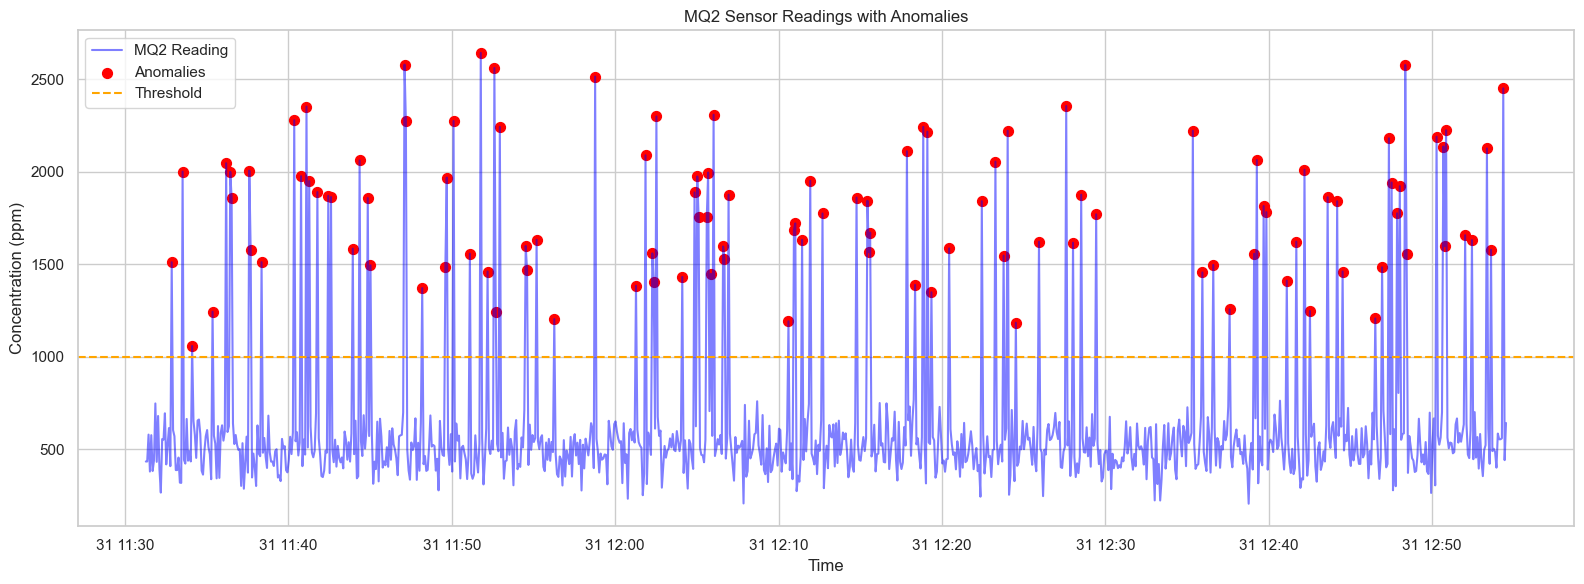

In [19]:
# Prepare data for plotting
df_time = df.sort_values('timestamp').set_index('timestamp')

# Plot MQ2 sensor with anomalies highlighted
plt.figure(figsize=(16, 6))
plt.plot(df_time.index, df_time['mq2'], label='MQ2 Reading', color='blue', alpha=0.5)
plt.scatter(df_time[df_time['mq2_anomaly']].index, 
           df_time[df_time['mq2_anomaly']]['mq2'], 
           color='red', label='Anomalies', s=50)
plt.axhline(y=thresholds['mq2'], color='orange', linestyle='--', label='Threshold')
plt.title('MQ2 Sensor Readings with Anomalies')
plt.xlabel('Time')
plt.ylabel('Concentration (ppm)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## Geospatial Visualization

Let's visualize some sample location data using Folium.

In [20]:
import folium
from folium.plugins import HeatMap

# Create a map centered at the mean location
center_lat = df['latitude'].mean()
center_lon = df['longitude'].mean()
m = folium.Map(location=[center_lat, center_lon], zoom_start=14)

# Add markers for anomalies
for _, row in df[df['is_anomaly']].iterrows():
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=f"MQ2: {row['mq2']:.2f}, MQ4: {row['mq4']:.2f}, Temp: {row['temperature']:.2f}°C",
        icon=folium.Icon(color='red', icon='warning-sign')
    ).add_to(m)

# Add heat map layer
heat_data = [[row['latitude'], row['longitude'], max(row['mq2'], row['mq4'], row['mq6'], row['mq8'])] 
             for _, row in df.iterrows()]
HeatMap(heat_data).add_to(m)

# Display map
m

## Generate Training Dataset with Labels

Let's create a properly labeled dataset for model training.

In [21]:
# Generate labeled synthetic dataset
features, labels = generate_synthetic_data(n_samples=5000, include_anomalies=True)

# Add labels to features
training_df = features.copy()
training_df['threat_level'] = labels

# Display data summary
print(f"Total samples: {len(training_df)}")
print(f"Threat samples: {training_df['threat_level'].sum()}")
print(f"Safe samples: {len(training_df) - training_df['threat_level'].sum()}")
print(f"Threat percentage: {100 * training_df['threat_level'].mean():.2f}%")

# Show the first few rows
training_df.head()

Total samples: 5000
Threat samples: 500
Safe samples: 4500
Threat percentage: 10.00%


,mq2,mq4,mq6,mq8,temperature,humidity,threat_level
0,454.521244,273.185819,374.438923,188.746434,25.017032,62.973983,0
1,424.935159,259.748636,229.588643,168.010261,18.237777,55.903768,0
2,437.379423,333.733252,518.504133,219.633832,28.472403,80.718844,0
3,460.956767,405.149988,460.650096,149.061269,22.774516,60.996561,0
4,526.466540,348.259658,353.619605,229.090771,19.572924,76.980236,0


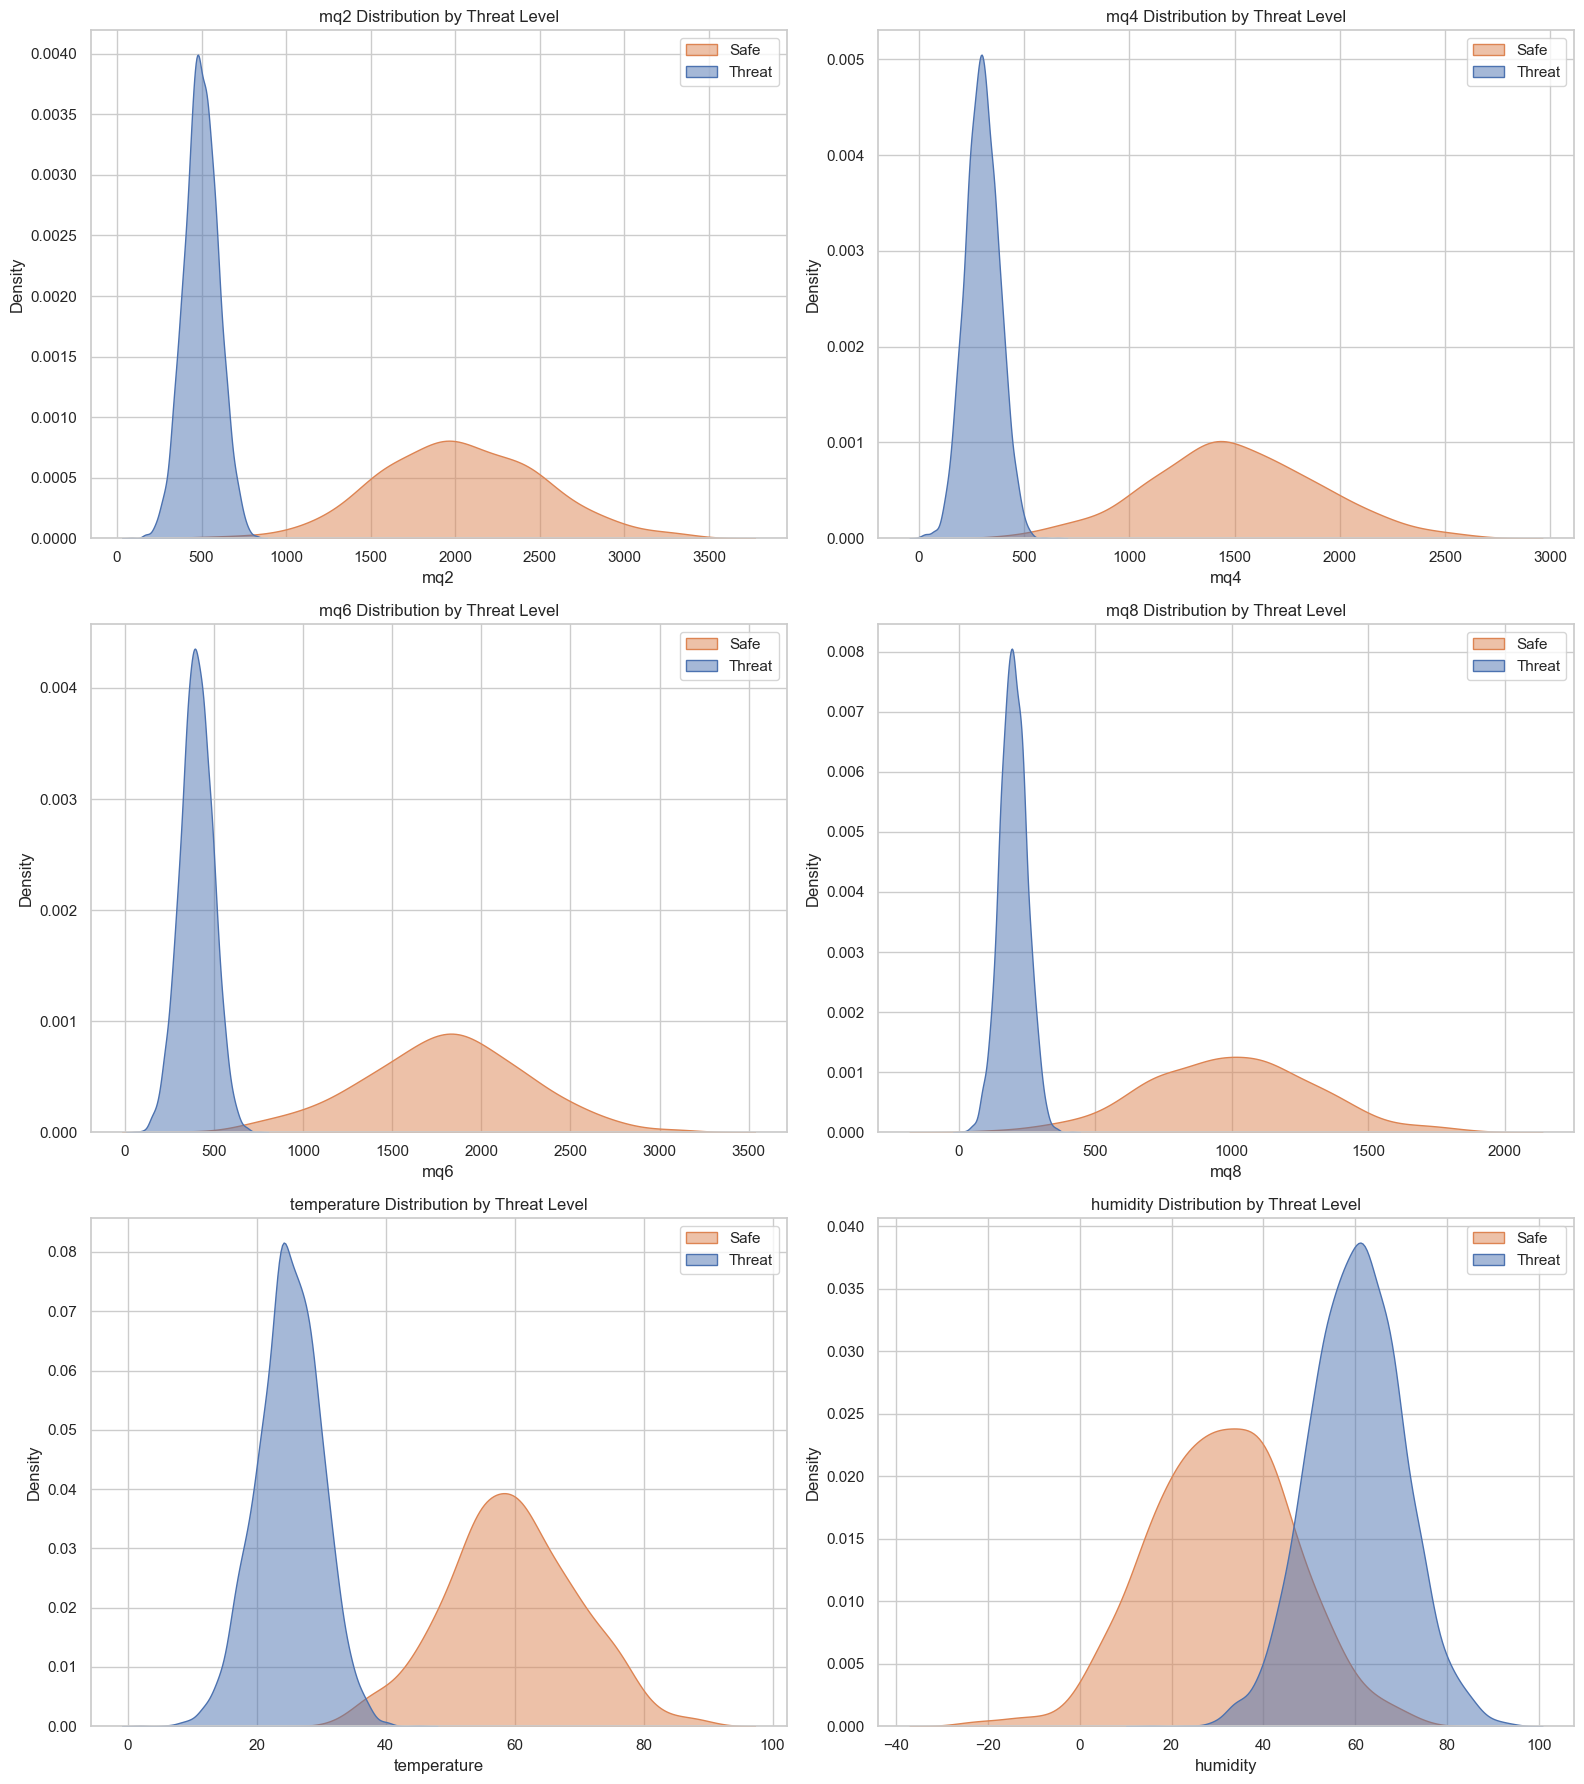

In [22]:
# Visualize the distribution of features by threat level
fig, axes = plt.subplots(3, 2, figsize=(16, 18))
sensors = ['mq2', 'mq4', 'mq6', 'mq8', 'temperature', 'humidity']

for i, sensor in enumerate(sensors):
    row = i // 2
    col = i % 2
    
    sns.kdeplot(
        data=training_df, x=sensor, hue='threat_level',
        fill=True, common_norm=False, alpha=0.5,
        ax=axes[row, col]
    )
    axes[row, col].set_title(f'{sensor} Distribution by Threat Level')
    axes[row, col].set_xlabel(sensor)
    axes[row, col].set_ylabel('Density')
    axes[row, col].legend(['Safe', 'Threat'])

plt.tight_layout()
plt.show()

## Save Processed Data for Model Training

In [23]:
# Save training data
import os

# Create directory if it doesn't exist
os.makedirs('../data/training', exist_ok=True)

# Save to CSV
training_df.to_csv('../data/training/synthetic_training_data.csv', index=False)

print(f"Saved training data to '../data/training/synthetic_training_data.csv'")

Saved training data to '../data/training/synthetic_training_data.csv'


## Conclusion

In this notebook, we've explored synthetic sensor data that mimics readings from MQ2, MQ4, MQ6, MQ8, and DHT11 sensors. We've visualized distributions, looked for correlations, examined time series patterns, and identified potential anomalies. We've also generated and saved a synthetic dataset for model training.

Next steps:
1. Replace synthetic data with real sensor data once available
2. Refine anomaly detection thresholds based on domain expertise
3. Develop and train models for threat prediction